#### Import of pandas library and uploading dataset from csv file

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
raw_data = pd.read_csv("/home/student/Pulpit/nypd.csv", low_memory=False)

#### Checking what values contains column "BOROUGH"

In [17]:
raw_data["BOROUGH"].value_counts()

BOROUGH
BROOKLYN         349682
QUEENS           299308
MANHATTAN        272131
BRONX            156906
STATEN ISLAND     49526
Name: count, dtype: int64

#### Searching for any NaN values, summimg them if present

In [18]:
raw_data["BOROUGH"].isna().sum()

484625

#### Replacing NaN values with "UNSPECIFIED"

In [73]:
data = raw_data["BOROUGH"].fillna(value="UNSPECIFIED")

#### Counting values in column "BOROUGH"

In [75]:
data_groupped = pd.DataFrame(statistics_data.value_counts())

#### Preparing plot: Amount of accidents in New York City Boroughs

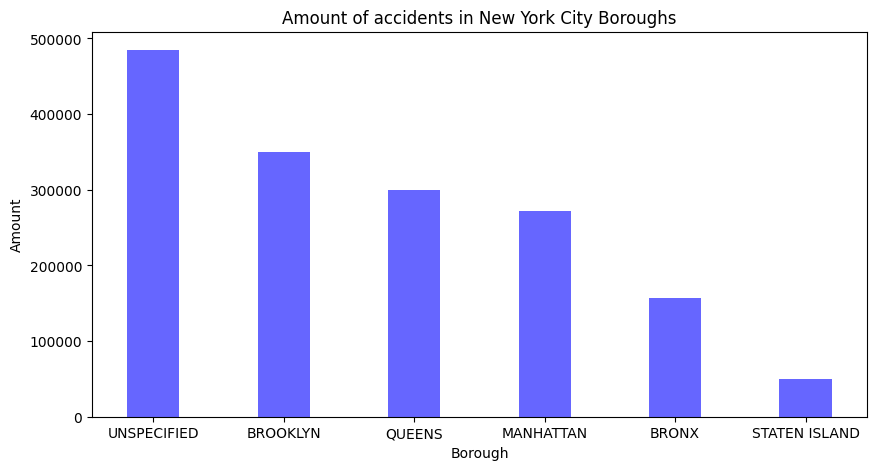

In [76]:
x = data_groupped.index
y = data_groupped["count"]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='#6666FF', width = 0.4)
 
plt.xlabel("Borough")
plt.ylabel("Amount")
plt.title("Amount of accidents in New York City Boroughs")
plt.show()

### Conlusions:
#### Most accidents occured in Brooklyn, least in Staten Island. The amount of accidents in Brooklyn is 7 times higher than the amount in Staten Island.
#### There is significant amount of accidents, that was not adressed to any specified borough. In the future, it will be nessesary to verify the location data (lattitude.longitude) and fill the NaNs in Borough column.

### Amount of accidents in relation to borough population

#### Excluding "Unspecified" values, preparing new dataset with data about New York City population

In [78]:
data_groupped_boroughs_only = pd.DataFrame(data_groupped.drop(labels="UNSPECIFIED"))

In [79]:
population = pd.DataFrame(
    {'BOROUGH':['MANHATTAN', 'BRONX', 'BROOKLYN', 'QUEENS','STATEN ISLAND'],
    'POPULATION':[1596273,1379946,2590516,2278029,491133]})

In [83]:
data_merged=population.merge(data_groupped_boroughs_only, on="BOROUGH")
data_merged["ACCIDENTS PER PERSON"]=data_merged["count"]/data_merged["POPULATION"]

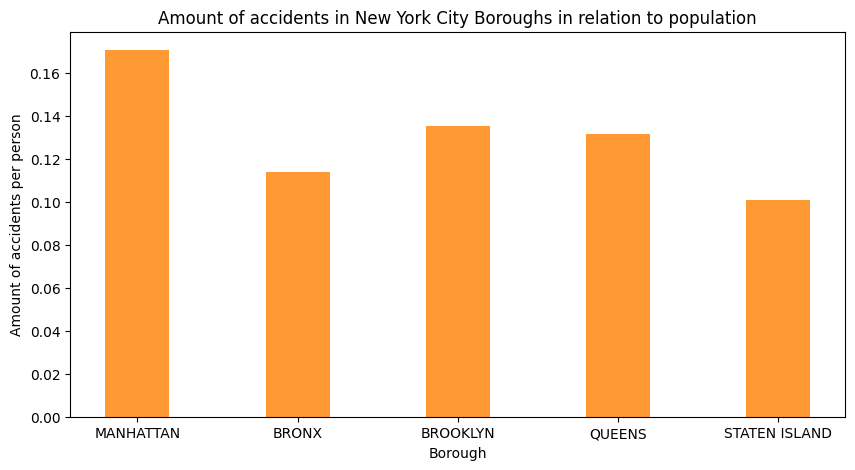

In [84]:
x = data_merged["BOROUGH"]
y = data_merged["ACCIDENTS PER PERSON"]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(x, y, color ='#FF9933', width = 0.4)
 
plt.xlabel("Borough")
plt.ylabel("Amount of accidents per person")
plt.title("Amount of accidents in New York City Boroughs in relation to population")
plt.show()

### Conlusions:
#### There is no such huge differences in results in comparison to previous plot. In relation to population, the highest amount of accidents happenned in Manhattan, instead of Brooklyn.